In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
#I am importing the seaborn package because it gives nice viz
import seaborn as sns

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from decimal import Decimal
import statsmodels.formula.api as smf
import time
from matplotlib.colors import ListedColormap

C:\Users\iGuest\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1.1 Loading the data in a dataframe

In [2]:
#Load the data set and carrying out general analysis
data = pd.read_csv('wdbc.csv')
# Dropping thye id column
data=data.drop(['id'], axis=1)

In [3]:
#Printing out the data after dropping the ID column
data.head(10)

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## 1.2 Summary statistic

In [4]:
# Summary statistic and coorelation table

print("The data has", len(data), "total diagnosis,", len(data[data.diagnosis == 'M']), "are Malignant and", len(data[data.diagnosis == 'B']), "are benign")

The data has 569 total diagnosis, 212 are Malignant and 357 are benign


MEAN, STANDARD DEVIATION, RANGE and null values OF ALL COLUMNS IN THE DATAFRAME GIVEN

In [5]:
x = (data.describe()).T.iloc[:,np.arange(1,8)]
x['nulls'] = data.isnull().sum()
x

,mean,std,min,25%,50%,75%,max,nulls
radius.mean,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,0
texture.mean,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,0
perimeter.mean,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,0
area.mean,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,0
smoothness.mean,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0
compactness.mean,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0
concavity.mean,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0
concpoints.mean,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0
symmetry.mean,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0
fracdim.mean,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0


In [6]:
data['diagnosis_num'] = np.where(data.diagnosis == 'M', 1, 0)

We first find the correlation of diagnosis value with all other factors

In [7]:
correlation = data.corr()['diagnosis_num']
correlation

radius.mean          0.730029
texture.mean         0.415185
perimeter.mean       0.742636
area.mean            0.708984
smoothness.mean      0.358560
compactness.mean     0.596534
concavity.mean       0.696360
concpoints.mean      0.776614
symmetry.mean        0.330499
fracdim.mean        -0.012838
radius.se            0.567134
texture.se          -0.008303
perimeter.se         0.556141
area.se              0.548236
smoothness.se       -0.067016
compactness.se       0.292999
concavity.se         0.253730
concpoints.se        0.408042
symmetry.se         -0.006522
fracdim.se           0.077972
radius.worst         0.776454
texture.worst        0.456903
perimeter.worst      0.782914
area.worst           0.733825
smoothness.worst     0.421465
compactness.worst    0.590998
concavity.worst      0.659610
concpoints.worst     0.793566
symmetry.worst       0.416294
fracdim.worst        0.323872
diagnosis_num        1.000000
Name: diagnosis_num, dtype: float64

In [8]:
data = data.drop(columns = ["diagnosis_num"])

We can see that the mean columns of various factors have a decent correlation with diagnosis. Now we try to find correlation between these columns.

To find correlation between columns, we make a function that iterates through a given correlation matrix and prints the correlation values which are relatively significant. We only feed column values into the function which will not have obvious correlation e.g. area,perimeter, radius will inherently tend to have a higher correlation so we avoid that. ALso we only choose the mean value attributes for correlation to reduce values.
We first run this function for the whole cancer dataset.

In [9]:
data1 = data.corr().iloc[[0,1,4,5,6,7,8,9],:]
def get_cor(data, cols):
    for elem in cols:
        t = data[elem]
        for i in range(0,len(cols)):  
            if((t[i] > 0.7 or t[i] < -0.7) and t[i]!=1):
                print("correlation of", t[i], "between",'\033[1m', elem,'\033[0m', "and", '\033[1m',cols[i],'\033[0m')

col = ['radius.mean', 'texture.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean']
get_cor(data1, col)

correlation of 0.8225285223871791 between  radius.mean  and  concpoints.mean 
correlation of 0.8831206701772499 between  compactness.mean  and  concavity.mean 
correlation of 0.8311350431336992 between  compactness.mean  and  concpoints.mean 
correlation of 0.8831206701772499 between  concavity.mean  and  compactness.mean 
correlation of 0.9213910263788594 between  concavity.mean  and  concpoints.mean 
correlation of 0.8225285223871791 between  concpoints.mean  and  radius.mean 
correlation of 0.8311350431336992 between  concpoints.mean  and  compactness.mean 
correlation of 0.9213910263788594 between  concpoints.mean  and  concavity.mean 


Now we run the function for data only of Malignant cancer

In [10]:
data1 = data[data.diagnosis == "M"].corr().iloc[[0,1,4,5,6,7,8,9],:]
def get_cor(data, cols):
    for elem in cols:
        t = data[elem]
        for i in range(0,len(cols)):  
            if((t[i] > 0.7 or t[i] < -0.7) and t[i]!=1):
                print("correlation of", t[i], "between",'\033[1m', elem,'\033[0m', "and", '\033[1m',cols[i],'\033[0m')

col = ['radius.mean', 'texture.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean']
get_cor(data1, col)

correlation of 0.7516898051671765 between  smoothness.mean  and  fracdim.mean 
correlation of 0.8477120753767601 between  compactness.mean  and  concavity.mean 
correlation of 0.7273488594832547 between  compactness.mean  and  concpoints.mean 
correlation of 0.7563180950757044 between  compactness.mean  and  fracdim.mean 
correlation of 0.8477120753767601 between  concavity.mean  and  compactness.mean 
correlation of 0.9071187407883988 between  concavity.mean  and  concpoints.mean 
correlation of 0.7273488594832547 between  concpoints.mean  and  compactness.mean 
correlation of 0.9071187407883988 between  concpoints.mean  and  concavity.mean 
correlation of 0.7516898051671765 between  fracdim.mean  and  smoothness.mean 
correlation of 0.7563180950757044 between  fracdim.mean  and  compactness.mean 


Now we run the correlation for benign diagnosis

In [11]:
data1 = data[data.diagnosis == "B"].corr().iloc[[0,1,4,5,6,7,8,9],:]
def get_cor(data, cols):
    for elem in cols:
        t = data[elem]
        for i in range(0,len(cols)):  
            if((t[i] > 0.7 or t[i] < -0.7) and t[i]!=1):
                print("correlation of", t[i], "between",'\033[1m', elem,'\033[0m', "and", '\033[1m',cols[i],'\033[0m')

col = ['radius.mean', 'texture.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean', 'concpoints.mean', 'symmetry.mean', 'fracdim.mean']
get_cor(data1, col)

correlation of 0.7549940837133197 between  compactness.mean  and  concavity.mean 
correlation of 0.7501191406202128 between  compactness.mean  and  concpoints.mean 
correlation of 0.7549940837133197 between  concavity.mean  and  compactness.mean 
correlation of 0.7118227061938834 between  concavity.mean  and  concpoints.mean 
correlation of 0.7501191406202128 between  concpoints.mean  and  compactness.mean 
correlation of 0.7118227061938834 between  concpoints.mean  and  concavity.mean 


We can see the difference in correlations between the attributes for Malignant and Benign datas. 

## 1.3 Graphical correlation

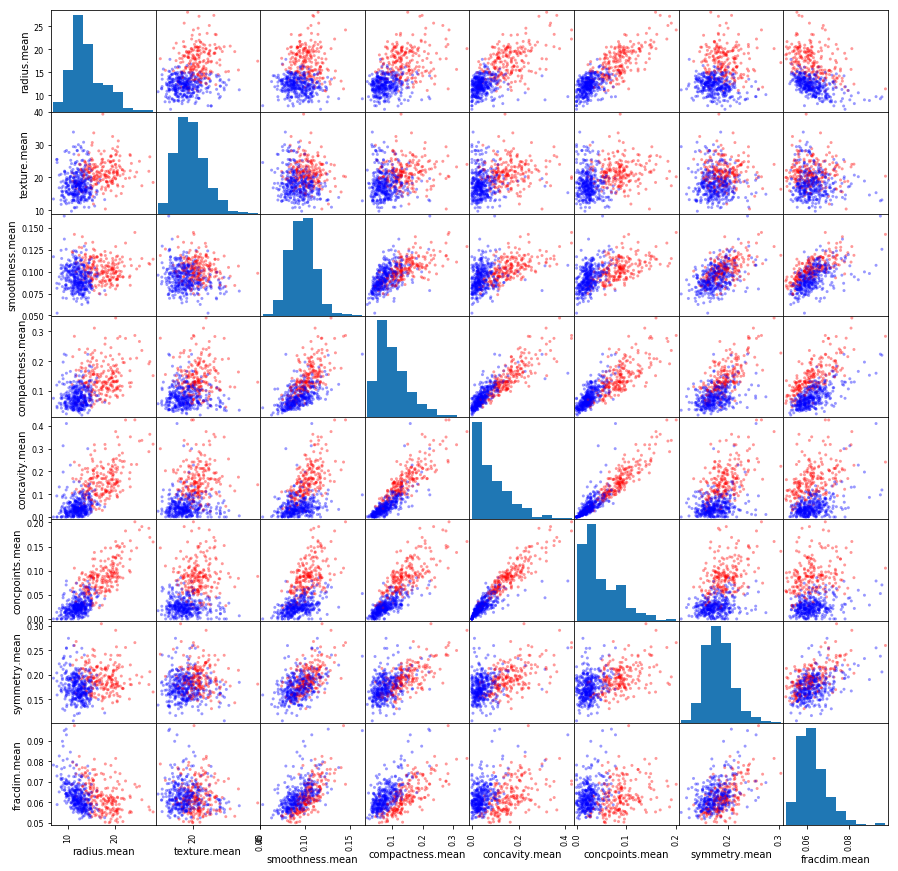

In [12]:
sm = pd.plotting.scatter_matrix(data[col], c=np.where(data.diagnosis == 'M', 'red', 'blue'), alpha=0.4, figsize=((15,15)));
plt.show()

# 2. Decision Boundary

We divide our data into training and testing

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, shuffle = False, train_size = 0.6)

# Setting diagnosis as the target variable
train_target = train.diagnosis

# Separating attribute values for training
train_attr = train[train.columns[1:len(train.columns)]]


# Setting diagnosis as the target variable: TESTING
test_target = test.diagnosis

# Separating attribute values for testing
test_attr = test[test.columns[1:len(test.columns)]]

C:\Users\iGuest\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


from the correlation graph we can see that compactness and concavity show high yet disticntly different correlations for the malignant and benign cancers. Hence we use those two parameters initially for classfication

## KNN classifier 

In [14]:
a = 'concavity.mean'
b = 'compactness.mean'
x = train_attr[[a, b]]
y = list(train_target)
n = 5
p = 2

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


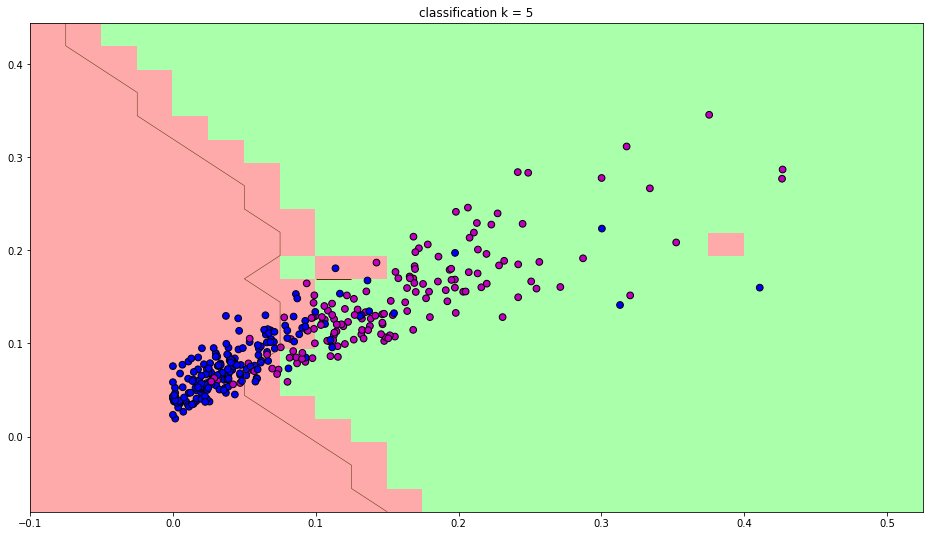

In [15]:
a = 'concavity.mean'
b = 'compactness.mean'
x = train_attr[[a, b]]
y = list(train_target)
n = 5
p = 2

from sklearn.neighbors import KNeighborsClassifier
cancer_clf = KNeighborsClassifier(n_neighbors=n,p=p)
cancer_clf.fit(x, y)

# Plotting decision regions
x_min, x_max = x[a].min() - 0.1, x[a].max() + 0.1
y_min, y_max = x[b].min() - 0.1, x[b].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025),
                     np.arange(y_min, y_max, 0.025))


from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


Z = cancer_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z1 = np.where(Z == "M", 1, 0)
z1 = z1.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, z1, cmap=cmap_light)
plt.contour(xx,yy,z1, linewidths = 0.5, levels = 7, cmap = plt.cm.BrBG)

# Plot also the training points
plt.scatter(x[a], x[b], c=y, cmap=cmap_bold, edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("classification k = %i"
          % (n))
plt.show()

In [16]:
np.shape(z1)

(22, 26)

In [17]:
from sklearn.metrics import accuracy_score


x_test = test_attr[[a, b]]

cancer_preds = cancer_clf.predict(x_test)
accuracy_score(cancer_preds, test_target)

0.8947368421052632

With a nearest neighbor value of 5 and Manhattan distance, we get an accurate classifier of 88%. We can observe from eyeballing that for points which are very close to each other, Knn fails to classify very accurately. It does pick up some noise, we can see some blue points in the green region. However, in terms of picking up the actual shape knn does not do a good job. It merely takes the shape the the boundary for that point of data in that region unlike Logistic regression which considers all the data.

## Logistic regression 

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


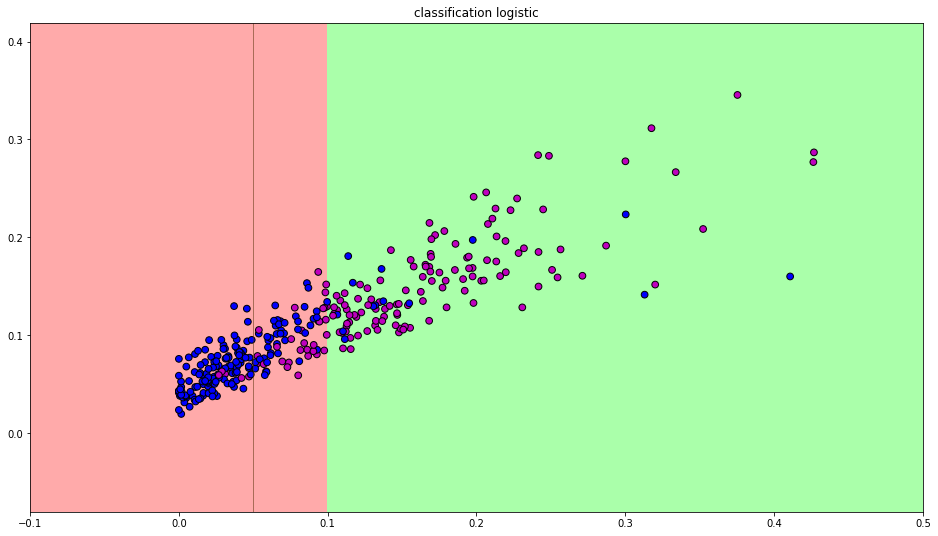

In [18]:
a = 'concavity.mean'
b = 'compactness.mean'
x = train_attr[[a, b]]
y = list(train_target)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l1').fit(x, y)
# Plotting decision regions
x_min, x_max = x[a].min() - 0.1, x[a].max() + 0.1
y_min, y_max = x[b].min() - 0.1, x[b].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))


from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z1 = np.where(Z == "M", 1, 0)
z1 = z1.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, z1, cmap=cmap_light)
plt.contour(xx,yy,z1, linewidths = 0.5, levels = 7, cmap = plt.cm.BrBG)


# Plot also the training points
plt.scatter(x[a], x[b], c=y, cmap=cmap_bold, edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("classification logistic")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score


x_test = test_attr[[a, b]]

cancer_preds = model.predict(x_test)
accuracy_score(cancer_preds, test_target)

0.9035087719298246

As we can see, for a manhattan distance for KNN and matching l1 penalty for Logistic Regression, we get a higher accuracy of 91.6% compared to KNN 89% for Logistic Regression.

We also observe that the logsitic model produces a linear decision boundary. However, KNN produces a more complicated non linear decision boundary for exactly same parameters and attributes. Despite the more complicated boundary, the accuracy of KNN is lower than logistic regression. This is a sign that KNN model picks more noise as compared to Logistic regression.

# Feature Engineering

Lets make a dataframe for training which holds all the engineered features.

In [20]:
# We first engineer features and save them as a matrix
a = 'concavity.mean'
b = 'compactness.mean'
x = train_attr[[a, b]]
y = list(train_target)
c = "eng1 a * b"
x[c] = x[a]*x[b]
d = "log of a"
x[d] = np.log1p(x[a])
e = "square of b"
x[e] = pow(x[b], 2)
x.head()

C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,concavity.mean,compactness.mean,eng1 a * b,log of a,square of b
0,0.3001,0.27760,0.083308,0.262441,0.077062
1,0.0869,0.07864,0.006834,0.083330,0.006184
2,0.1974,0.15990,0.031564,0.180153,0.025568
3,0.2414,0.28390,0.068533,0.216240,0.080599
4,0.1980,0.13280,0.026294,0.180653,0.017636


Now we make a dataframe for testing purposes

In [21]:
x_test = test_attr[[a, b]]
y_test = list(test_target)
c = "eng1 a * b"
x_test[c] = x_test[a]*x_test[b]
d = "log of a"
x_test[d] = np.log1p(x_test[a])
e = "square of b"
x_test[e] = pow(x_test[b], 2)
x_test.head()

C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,concavity.mean,compactness.mean,eng1 a * b,log of a,square of b
341,0.08422,0.09228,0.007772,0.080861,0.008516
342,0.05397,0.09097,0.004910,0.052564,0.008276
343,0.18630,0.13390,0.024946,0.170839,0.017929
344,0.04006,0.07281,0.002917,0.039278,0.005301
345,0.03581,0.09159,0.003280,0.035184,0.008389


Now we model our logistic regression using x, y and some of the engineered features

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


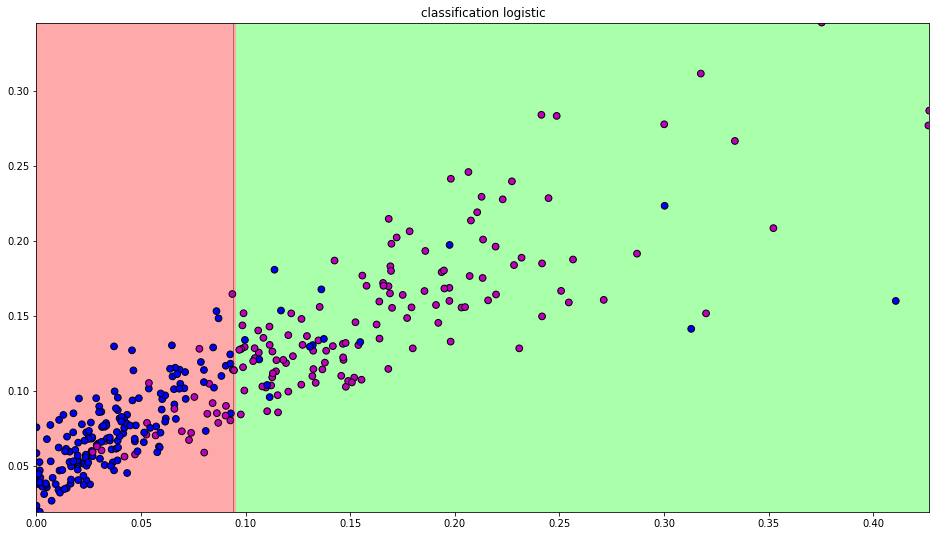

In [22]:
# Modelling using product of a*b and log of a
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l1').fit(x[[a,b,c,d]], y)


# Plotting decision regions
x_min, x_max = x[a].min(), x[a].max()
y_min, y_max = x[b].min(), x[b].max()
z_min, z_max = x[c].min(), x[c].max()
u_min, u_max = x[d].min(), x[d].max()


xx, zz = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(z_min, z_max, 341))

xx, uu = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(u_min, u_max, 341))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(y_min, y_max, 341))






from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel(), uu.ravel()])

# Put the result into a color plot
z1 = np.where(Z == "M", 1, 0)
z1 = z1.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, z1, cmap=cmap_light)
plt.contour(xx,yy,z1, linewidths = 0.5, levels = 1, cmap = plt.cm.BrBG)


# Plot also the training points
plt.scatter(x[a], x[b], c=y, cmap=cmap_bold, edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("classification logistic")
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

cancer_preds = model.predict(x_test[[a,b,c,d]])
accuracy_score(cancer_preds, y_test)

0.9035087719298246

Now lets make the model using  only the engineered features

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


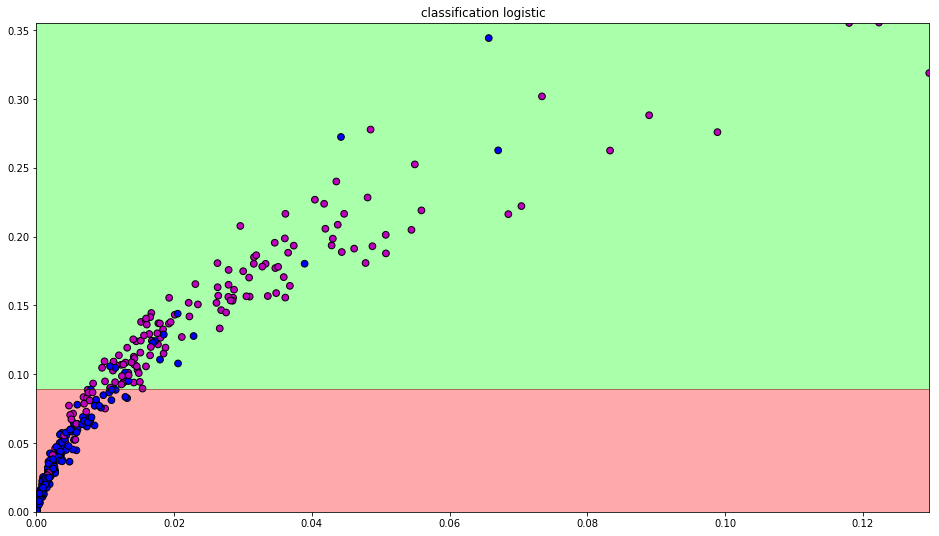

In [24]:
# Modelling using only the engineered features
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l1').fit(x[[c,d,e]], y)


# Plotting decision regions
x_min, x_max = x[c].min(), x[c].max()
y_min, y_max = x[d].min(), x[d].max()
z_min, z_max = x[e].min(), x[e].max()


xx, zz = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(z_min, z_max, 341))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(y_min, y_max, 341))






from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

# Put the result into a color plot
z1 = np.where(Z == "M", 1, 0)
z1 = z1.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, z1, cmap=cmap_light)
plt.contour(xx,yy,z1, linewidths = 0.5, levels = 1, cmap = plt.cm.BrBG)


# Plot also the training points
plt.scatter(x[c], x[d], c=y, cmap=cmap_bold, edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("classification logistic")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score


cancer_preds = model.predict(x_test[[c,d,e]])
accuracy_score(cancer_preds, y_test)

0.8991228070175439

For the logarithm function, the logistic regression model performs better with a l2 penalty with a 91% accuracy.

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


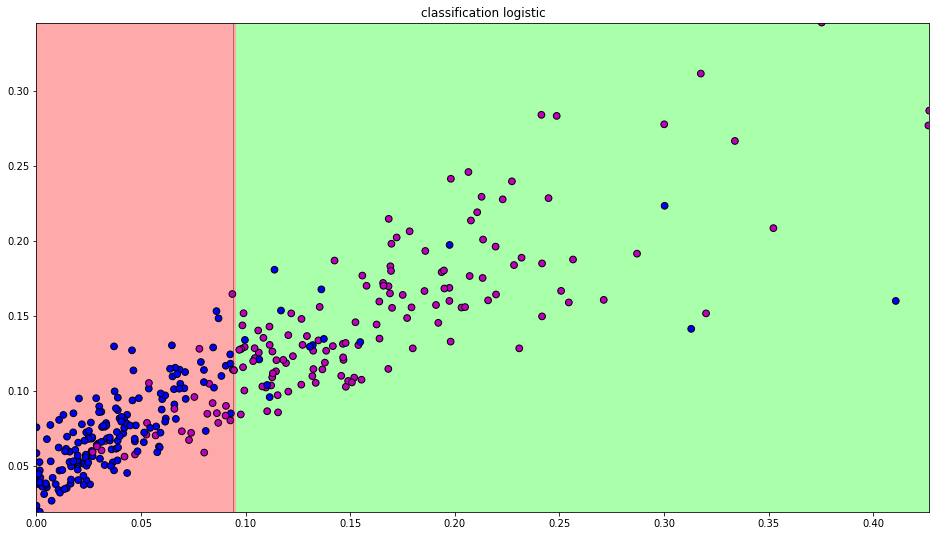

In [26]:
# Modeling using x,y, x*y and sq of y

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l1').fit(x[[a,b,c,e]], y)


# Plotting decision regions
u_min, u_max = x[a].min(), x[a].max()
x_min, x_max = x[b].min(), x[b].max()
y_min, y_max = x[c].min(), x[c].max()
z_min, z_max = x[e].min(), x[e].max()


xx, zz = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(z_min, z_max, 341))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 341),
                    np.linspace(y_min, y_max, 341))


uu, xx = np.meshgrid(np.linspace(u_min, u_max, 341),
                    np.linspace(x_min, x_max, 341))




from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


Z = model.predict(np.c_[uu.ravel(), xx.ravel(), yy.ravel(), zz.ravel()])

# Put the result into a color plot
z1 = np.where(Z == "M", 1, 0)
z1 = z1.reshape(uu.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(uu, xx, z1, cmap=cmap_light)
plt.contour(uu,xx,z1, linewidths = 0.5, levels = 1, cmap = plt.cm.BrBG)


# Plot also the training points
plt.scatter(x[a], x[b], c=y, cmap=cmap_bold, edgecolor='k', s=45)
plt.xlim(uu.min(), uu.max())
plt.ylim(xx.min(), xx.max())
plt.title("classification logistic")
plt.show()

In [27]:
from sklearn.metrics import accuracy_score


cancer_preds = model.predict(x_test[[a,b,c,e]])
accuracy_score(cancer_preds, y_test)

0.9035087719298246

# Cross Validation

In [28]:
data.drop(data.index[range(1,100)])

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
100,M,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,...,16.990,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
102,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,...,13.340,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,...,10.760,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
104,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,...,11.540,23.31,74.22,402.8,0.12190,0.14860,0.07987,0.03203,0.2826,0.07552
105,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.207100,0.096010,0.1925,...,16.310,22.40,106.40,827.2,0.18620,0.40990,0.63760,0.19860,0.3147,0.14050
106,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
107,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.019210,0.1602,...,13.290,27.49,85.56,544.1,0.11840,0.19630,0.19370,0.08442,0.2983,0.07185
108,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789


First we make a function which returns us test and train samples based on certain row values we give

In [29]:
def sampler(i,j,data):
    x = data[i:j]
    y = data.drop(data.index[range(i,j)])
    return(x,y) 


test, train = sampler(98,107, data)
test

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
98,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
99,M,14.420,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,...,16.33,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353
100,M,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,16.99,35.27,108.60,906.5,0.1265,0.19430,0.31690,0.11840,0.2651,0.07397
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
102,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,...,10.76,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490
104,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,...,11.54,23.31,74.22,402.8,0.1219,0.14860,0.07987,0.03203,0.2826,0.07552
105,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,...,16.31,22.40,106.40,827.2,0.1862,0.40990,0.63760,0.19860,0.3147,0.14050
106,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.14,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097


We now make a k fold cross validation function which accepts number of k, data, target variable, penalty

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def kfoldcv(k, data, pen):
    results = pd.DataFrame(columns = ["accuracy", "precision", "recall"])
    results
    i = 0
    d = int(np.floor(len(data)/k))
    j = d
    for i in range(0,k):
        #If we are in the last iteration
        if(i == k-1):
            test, train = sampler(len(data) - d, len(data), data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
        else:
            test, train = sampler(i, j, data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
            i = i+ d
            j = j + d
    idx = len(results) + 1
    t1 = np.mean(results['accuracy'])
    t2 = np.mean(results['precision'])
    t3 = np.mean(results['recall'])
    results.loc[idx] = [t1,t2,t3]  
    return(results)

res = kfoldcv(10, data, 'l1')
res                 

,accuracy,precision,recall
1,0.875000,0.805556,0.922222
2,0.909910,0.907407,0.925373
3,0.921687,0.927399,0.923983
4,0.909502,0.918792,0.911994
5,0.923913,0.930445,0.923913
6,0.930514,0.939866,0.924475
7,0.935233,0.949187,0.924242
8,0.950113,0.961538,0.937853
9,0.923387,0.924092,0.912690
10,0.964286,0.949911,0.949911


In [31]:
len(data.columns)

31

# Regularization

First, let's assign values for lambda and c.

In [32]:
cc = np.logspace(-6,6,30)
lam = 1/cc

We modify the k cross validation function for accomodating type of regularization

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def kfoldcv(k, data, pen, c):
    results = pd.DataFrame(columns = ["accuracy", "precision", "recall"])
    results
    i = 0
    d = int(np.floor(len(data)/k))
    j = d
    for i in range(0,k):
        #If we are in the last iteration
        if(i == k-1):
            test, train = sampler(len(data) - d, len(data), data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen, C = c).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
        else:
            test, train = sampler(i, j, data)
            x_train = train[train.columns[1:len(train.columns)]]
            y_train = train.diagnosis
            x_test = test[test.columns[1:len(train.columns)]]
            y_test = test.diagnosis
            model = LogisticRegression(penalty = pen, C = c).fit(x_train, y_train)
            label_predict = model.predict(x_test)
            t1 = accuracy_score(y_test, label_predict)
            t2 = precision_score(y_test, label_predict, average = 'macro')
            t3 = recall_score(y_test, label_predict, average = 'macro')
            idx = len(results) + 1
            results.loc[idx] = [t1,t2,t3]
            i = i+ d
            j = j + d
    idx = len(results) + 1
    t1 = np.mean(results['accuracy'])
    t2 = np.mean(results['precision'])
    t3 = np.mean(results['recall'])
    results.loc[idx] = [t1,t2,t3]  
    return(results)
              

## Ridge classifier

In [34]:

for elem in cc:
    print("for the value of ,", 1/elem, "of lambda AND for value of,", elem, "of C : AVERAGE scores are:")
    res = kfoldcv(10, data, 'l2', elem)
    print(res.iloc[[10],:])
    print("###########################")


for the value of , 1000000.0 of lambda AND for value of, 1e-06 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.776824   0.824999  0.779686
###########################
for the value of , 385662.0421163472 of lambda AND for value of, 2.592943797404667e-06 of C : AVERAGE scores are:
    accuracy  precision    recall
11   0.81307   0.847121  0.811579
###########################
for the value of , 148735.21072935118 of lambda AND for value of, 6.723357536499335e-06 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.832883   0.861632  0.830806
###########################
for the value of , 57361.52510448681 of lambda AND for value of, 1.7433288221999873e-05 of C : AVERAGE scores are:
    accuracy  precision    recall
11  0.847197   0.870121  0.845794
###########################
for the value of , 22122.1629107045 of lambda AND for value of, 4.520353656360241e-05 of C : AVERAGE scores are:
    accuracy  precision   recall
11  0.862664   0.879343  0.86198
###

## Lasso Classifier 

In [35]:
for elem in cc:
    print("for the value of ,", 1/elem, "of lambda AND for value of,", elem, "of C : AVERAGE scores are:")
    res = kfoldcv(10, data, 'l1', elem)
    print(res.iloc[[10],:])
    print("###########################")

for the value of , 1000000.0 of lambda AND for value of, 1e-06 of C : AVERAGE scores are:


C:\Users\iGuest\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 385662.0421163472 of lambda AND for value of, 2.592943797404667e-06 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 148735.21072935118 of lambda AND for value of, 6.723357536499335e-06 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 57361.52510448681 of lambda AND for value of, 1.7433288221999873e-05 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.516373   0.258187     0.5
###########################
for the value of , 22122.1629107045 of lambda AND for value of, 4.520353656360241e-05 of C : AVERAGE scores are:
    accuracy  precision  recall
11  0.523516   0.261758     0.5
###########################
for the value of , 8531.678524172805 of lambda AND for value of, 0.0001172102297533

We define c values as 30 values between 10 power-6 and 10 power 6. We use these values reciprocal to find lambda.



We run our analysis on both Ridge and Lasso penalties for regularization
For Ridge classification

for the value of , 6.723357536499335e-06 of lambda AND for value of, 148735.21072935118 of C : AVERAGE scores are:
accuracy  precision    recall
0.943446   0.937995  0.941492

For Lasso Classifier

for the value of , 6.723357536499335e-06 of lambda AND for value of, 148735.21072935118 of C : AVERAGE scores are:
accuracy  precision    recall
0.956728   0.953734  0.956618


We can verify the coefficient values for these lambda values by making the regularization coefficients graph, for a random sample of test and train.

In [78]:
test, train = sampler(10, 180, data)
x_train = train[train.columns[1:len(train.columns)]]
y_train = train.diagnosis
x_test = test[test.columns[1:len(train.columns)]]
y_test = test.diagnosis

In [56]:
#perform tuning and record the results C = 0.01, 0.001 and 0.0001 and regularization l1

var = np.zeros(shape = (30,31))
acc = list()
for i in range(0,30):
    model3 = LogisticRegression(penalty = 'l2', C = cc[i]).fit(x_train, y_train)
    label_predict3 = model3.predict(x_test)
    l = list(model3.coef_)[0]
    for j in range(0,30):
        var[i,j] = l[j]
    var[i,30] = accuracy_score(y_test, label_predict3)

c = pd.DataFrame(var)

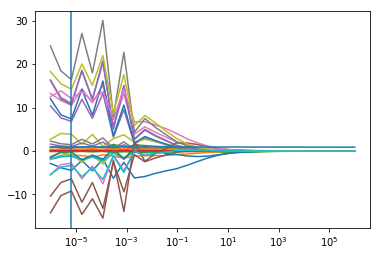

In [57]:
fig, ax = plt.subplots()
ax = plt.gca()
for i in range(0,31):
    ax.set_xscale('log')
    ax.plot(lam, c[i])

ax.axvline(x=6.723357536499335e-06)

In [58]:
#perform tuning and record the results C = 0.01, 0.001 and 0.0001 and regularization l1

var = np.zeros(shape = (30,31))
acc = list()
for i in range(0,30):
    model3 = LogisticRegression(penalty = 'l1', C = cc[i]).fit(x_train, y_train)
    label_predict3 = model3.predict(x_test)
    l = list(model3.coef_)[0]
    for j in range(0,30):
        var[i,j] = l[j]
    var[i,30] = accuracy_score(y_test, label_predict3)

c = pd.DataFrame(var)

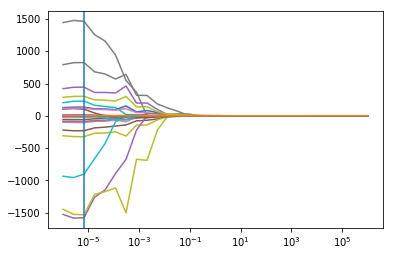

In [59]:
fig, ax = plt.subplots()
ax = plt.gca()
for i in range(0,31):
    ax.set_xscale('log')
    ax.plot(lam, c[i])

ax.set_xscale('log')
ax.plot(lam, c[30])
ax.axvline(x=6.723357536499335e-06)

# ROC 

# Comparing 5 models:
1. KNN k = 5
2. KNN k = 6
3. KNN k = 7
4. Logistic Regression
5. Naive Bayes

## Making a ROC function for plotting curve of a model


In [188]:
data_col = data[data.columns[1:len(data.columns)]]
x_train, x_test, y_train, y_test = train_test_split(data_col, data.diagnosis, test_size=1/3, random_state=1)
y_test = np.where(y_test == "M", 1, 0)
y_train = np.where(y_train == "M", 1, 0)


In [238]:
from sklearn.preprocessing import binarize
from sklearn.metrics import auc, roc_curve

def rocfinder(m):
    nt = 10
    n = np.shape(y_test)[0]
    tpLog = []
    fpLog = []
    thresh = np.linspace(0, 0.9, nt)
    #prob = m.predict_proba(x_test)[:,1]
    for i in thresh:
        #x = binarize([prob], i)[0]
        tpLogt = sum(((prob >= i) == True) & (y_test == 1)) / sum(y_test)
        fpLogt = sum((prob >= i) & (y_test == 0)) / sum(y_test == 0)
        tpLog.append(tpLogt)
        fpLog.append(fpLogt)
        fig, ax = plt.subplots()
        ax.plot(fpLog, tpLog)  
    
    print("auc is",auc(fpLog, tpLog), "for threshhold = ", i)
    

In [171]:
hatyLog = m.predict_proba(x_test)[:,1]

hatyLog

array([3.07351723e-01, 6.65249388e-01, 3.49539252e-03, 9.99541582e-01,
       9.00314247e-01, 9.99222128e-01, 9.99991963e-01, 9.94722547e-01,
       7.05269510e-03, 1.01087359e-02, 1.04640188e-02, 8.59746869e-01,
       9.34930895e-01, 9.24334284e-03, 3.16853131e-01, 1.12153578e-01,
       1.78884948e-02, 1.73251806e-02, 2.29809724e-03, 9.99999781e-01,
       6.78115949e-03, 2.86237502e-02, 9.99642813e-01, 1.85255708e-02,
       9.56281845e-01, 7.65873977e-02, 7.42015767e-02, 9.99999646e-01,
       1.00000000e+00, 9.97968258e-01, 1.00000000e+00, 2.96394390e-03,
       9.99975987e-01, 9.15093649e-01, 1.02891497e-02, 1.14410771e-02,
       9.99466306e-01, 1.61061573e-01, 4.65211399e-01, 5.39158139e-03,
       1.41990295e-03, 1.58938405e-01, 5.64296206e-02, 8.01615241e-03,
       2.19607911e-02, 9.24354851e-01, 1.58581779e-02, 1.34444998e-03,
       1.81482704e-01, 9.94897900e-01, 9.99988165e-01, 1.00000000e+00,
       3.44586313e-03, 2.71544869e-03, 9.19573127e-03, 3.26652406e-02,
      

In [124]:
# Logistical model
m = LogisticRegression().fit(x_train, y_train)

array([[100.],
       [ 38.],
       [ 38.],
       [ 36.],
       [ 35.],
       [ 35.],
       [ 35.],
       [ 35.],
       [ 35.],
       [ 35.],
       [ 34.],
       [ 33.],
       [ 33.],
       [ 33.],
       [ 31.],
       [ 31.],
       [ 29.],
       [ 28.],
       [ 27.],
       [  0.]])

In [ ]:
m = LogisticRegression().fit(x_train, y_train)